**Importing Required Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv(r"C:\Users\mythi\Downloads\data\data\demo_data\8.twospirals.csv",header=None)

In [4]:
df.head()

,0,1,2
0,-2.543456,-10.816358,0
1,9.434466,-2.572000,0
2,3.368646,-10.194671,0
3,1.341407,-4.204140,0
4,9.547758,-2.220580,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2000 non-null   float64
 1   1       2000 non-null   float64
 2   2       2000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 47.0 KB


<AxesSubplot:xlabel='0', ylabel='1'>

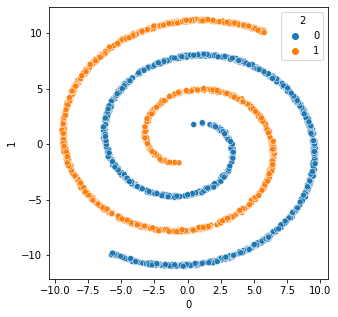

In [7]:
plt.figure(figsize = (5,5))
sns.scatterplot(x = df[0], y = df[1], hue = df[2])

**Splitting train and test data**

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df[[0,1]], df[2], train_size = 0.25)

In [9]:
#Shape of 'x_train' and 'y_train'

print(x_train.shape,y_train.shape)

#Shape of 'x_test' and 'y_test'

print(x_test.shape,y_test.shape)

(500, 2) (500,)
(1500, 2) (1500,)


**Standardizing the train data**

In [10]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

In [11]:
std_train=std.fit_transform(x_train)

In [12]:
std_train

array([[-0.37063522,  1.68835118],
       [ 1.61977396, -0.5968975 ],
       [ 0.30424746, -1.11890597],
       [ 1.46912188,  0.66116674],
       [-0.79320004, -1.04018855],
       [-0.20741195, -0.69125153],
       [ 1.05482756, -0.51941322],
       [ 0.49554629, -0.42688207],
       [-0.91405221, -1.00783102],
       [-0.7331673 ,  1.54098796],
       [ 0.02897398, -1.64194776],
       [-0.84763011, -1.5392821 ],
       [-0.83905626, -1.54948372],
       [ 0.23556714,  1.29341453],
       [ 0.93251378, -1.37419542],
       [-0.12113388,  1.75362267],
       [ 1.29527712, -1.0859832 ],
       [ 0.88822576,  1.66821004],
       [ 1.68317058,  0.22797706],
       [-1.31720874,  1.09406733],
       [ 0.70788324,  1.7122264 ],
       [ 0.65359928,  0.68063235],
       [-0.06070637, -1.1778839 ],
       [-1.53524605,  0.79075364],
       [ 0.58632114,  1.72591258],
       [ 1.59286343,  0.44690186],
       [-0.64525778, -1.08758899],
       [ 1.00235461,  1.61282143],
       [-0.96747871,

**Creating Dense layers**

In [13]:
import tensorflow
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [14]:
model=Sequential()
model.add(Dense(7, activation = 'relu', input_dim = 2, kernel_initializer='he_uniform'))
model.add(Dense(4, activation = 'relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation = 'relu', kernel_initializer='he_uniform'))
model.add(Dense(4, activation = 'relu', kernel_initializer='he_uniform'))
model.add(Dense(4, activation = 'relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation = 'sigmoid'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 21        
                                                                 
 dense_1 (Dense)             (None, 4)                 32        
                                                                 
 dense_2 (Dense)             (None, 3)                 15        
                                                                 
 dense_3 (Dense)             (None, 4)                 16        
                                                                 
 dense_4 (Dense)             (None, 4)                 20        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 109
Trainable params: 109
Non-trainable pa

**Compile**

In [16]:
model.compile(optimizer="Adam",loss='binary_crossentropy',metrics=['accuracy'])

**Fitting**

In [17]:
save=model.fit(x_train,y_train,batch_size=10,epochs=800,validation_split=0.15)

Epoch 1/800
43/43 [==============================] - 2s 9ms/step - loss: 0.7813 - accuracy: 0.4965 - val_loss: 0.6331 - val_accuracy: 0.6267
Epoch 2/800
43/43 [==============================] - 0s 3ms/step - loss: 0.6987 - accuracy: 0.5059 - val_loss: 0.6361 - val_accuracy: 0.6533
Epoch 3/800
43/43 [==============================] - 0s 3ms/step - loss: 0.6808 - accuracy: 0.5247 - val_loss: 0.6312 - val_accuracy: 0.6400
Epoch 4/800
43/43 [==============================] - 0s 3ms/step - loss: 0.6662 - accuracy: 0.5576 - val_loss: 0.6285 - val_accuracy: 0.7200
Epoch 5/800
43/43 [==============================] - 0s 3ms/step - loss: 0.6542 - accuracy: 0.6235 - val_loss: 0.6182 - val_accuracy: 0.7200
Epoch 6/800
43/43 [==============================] - 0s 3ms/step - loss: 0.6470 - accuracy: 0.6259 - val_loss: 0.6154 - val_accuracy: 0.7200
Epoch 7/800
43/43 [==============================] - 0s 3ms/step - loss: 0.6428 - accuracy: 0.6259 - val_loss: 0.6105 - val_accuracy: 0.6400
Epoch 8/800
4

In [20]:
tl=save.history["loss"]
cvl=save.history["val_loss"]

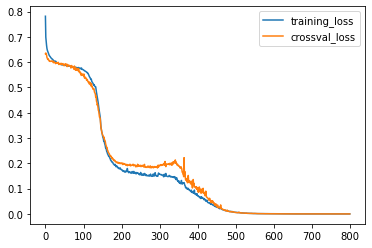

In [21]:
plt.plot(tl,label="training_loss")
plt.plot(cvl,label="crossval_loss")
plt.legend()

In [22]:
pred_train = model.predict(x_train)

16/16 [==============================] - 0s 2ms/step


In [23]:
pred_train

array([[1.00000000e+00],
       [9.17340648e-11],
       [9.99999583e-01],
       [6.34513455e-08],
       [9.99998748e-01],
       [2.26569864e-05],
       [9.99998868e-01],
       [3.33670287e-05],
       [9.99999881e-01],
       [1.00000000e+00],
       [1.86424612e-10],
       [3.56384044e-06],
       [2.50355902e-06],
       [2.07301820e-08],
       [1.54973311e-13],
       [1.00000000e+00],
       [1.71710129e-12],
       [9.99999881e-01],
       [4.71068795e-10],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [9.99998808e-01],
       [1.00000000e+00],
       [1.00000000e+00],
       [3.55589691e-09],
       [9.99994695e-01],
       [9.99999940e-01],
       [1.68287106e-09],
       [1.00000000e+00],
       [9.99999225e-01],
       [3.96691803e-06],
       [1.54719038e-09],
       [3.04666585e-08],
       [9.99999285e-01],
       [2.55699183e-06],
       [9.99997020e-01],
       [9.99998212e-01],
       [1.63718561e-12],
       [9.99999225e-01],


In [24]:
import numpy as np
train_pred = np.where(pred_train<0.5,0,1)

In [25]:
train_pred.shape

(500, 1)

In [26]:
y_pred = train_pred.flatten()

In [27]:
y_pred.shape

(500,)

<AxesSubplot:xlabel='0', ylabel='1'>

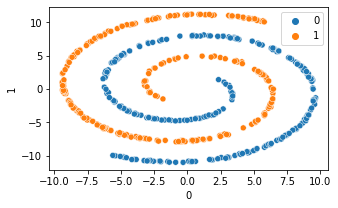

In [28]:
plt.figure(figsize = (5,3))
sns.scatterplot(x=x_train[0],y=x_train[1],hue=y_pred)

<AxesSubplot:xlabel='0', ylabel='1'>

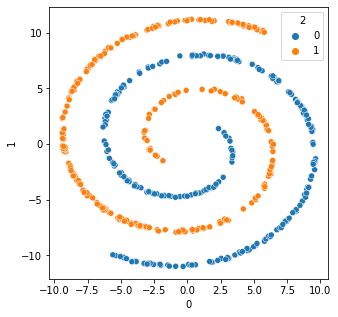

In [30]:
plt.figure(figsize = (5,5))
sns.scatterplot(x=x_train[0],y=x_train[1],hue=y_train)

In [31]:
from mlxtend.plotting import plot_decision_regions

4050/4050 [==============================] - 5s 1ms/step


<AxesSubplot:>

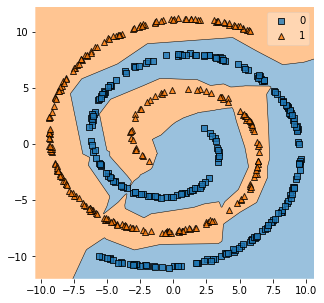

In [33]:
plt.figure(figsize = (5,5))
plot_decision_regions(x_train[[0,1]].values,y_train.values.astype(int),clf=model)

4050/4050 [==============================] - 5s 1ms/step


<AxesSubplot:>

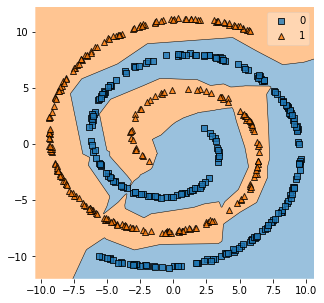

In [34]:
plt.figure(figsize = (5,5))
plot_decision_regions(x_train[[0,1]].values,y_pred.astype(int),clf=model)

In [35]:
from sklearn import metrics
metrics.accuracy_score(y_train, y_pred)

1.0